In [5]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

#cluster
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder # one hot coding
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler # Standarization
# Import module for k-protoype cluster
#from kmodes.kmodes import KModes
from collections import Counter, defaultdict # coun the number of samples in each cluster


#plot
import matplotlib.pyplot as plt
# Import module for data visualization
#from plotnine import *
#import plotnine
# Use the theme of ggplot
plt.style.use('ggplot')

In [6]:
df_customer_service = pd.read_pickle('customer_service_reps')
df_customer_service

,customer_service_rep_id,subid,current_sub_TF,cancel_date,account_creation_date,num_trial_days,trial_completed_TF,billing_channel,revenue_net_1month,payment_period,last_payment,next_payment,renew
4,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,0,2019-11-26 03:30:29,2019-11-26 03:30:29,NaN
5,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,1,2019-11-26 03:30:29,2019-12-27 03:30:29,NaN
6,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,2,2019-12-27 03:30:29,2020-01-26 03:30:29,NaN
7,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,3,2020-01-26 03:30:29,NaT,NaN
8,31174901,25914865,True,NaT,2020-03-19 01:20:25,14,True,itunes,1.1377,0,2020-03-19 01:20:25,2020-04-02 01:20:25,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2248409,30859916,26845271,False,NaT,2019-06-30 06:24:24,0,True,google,0.6239,3,2019-08-27 20:23:27,2019-09-24 20:23:29,NaN
2248410,30859916,26845271,False,NaT,2019-06-30 06:24:24,0,True,google,0.6239,4,2019-09-24 20:23:29,2019-10-25 20:23:28,NaN
2248411,30859916,26845271,False,NaT,2019-06-30 06:24:24,0,True,google,0.6239,5,2019-10-25 20:23:28,2019-11-24 20:23:29,NaN
2248412,30859916,26845271,False,NaT,2019-06-30 06:24:24,0,True,google,0.6239,6,2019-11-24 20:23:29,2019-12-25 20:23:27,NaN


In [7]:
df_customer_service['last_payment'] = pd.to_datetime(df_customer_service['last_payment']) 
df_customer_service['last_payment_month']=df_customer_service['last_payment'].dt.month
df_customer_service['last_payment_year']=df_customer_service['last_payment'].dt.year


In [13]:
df_eng = pd.read_pickle('engagement')
df_eng

,subid,date,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,payment_period
1,22349235,2019-07-01,1.0,1.0,0.0,6.0,0.0,0.0,0.0
2,22349235,2019-07-02,1.0,0.0,0.0,5.0,0.0,0.0,0.0
3,22349235,2019-07-03,0.0,1.0,0.0,0.0,0.0,0.0,0.0
50,20848497,2019-07-02,1.0,0.0,7.0,7.0,0.0,0.0,0.0
51,22680106,2019-07-02,2.0,1.0,7.0,7.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
28832315,28409777,2020-04-21,2.0,0.0,4.0,4.0,0.0,1.0,1.0
28832317,28409777,2020-04-22,2.0,0.0,4.0,4.0,0.0,1.0,1.0
28832319,28409777,2020-04-23,0.0,0.0,4.0,4.0,0.0,1.0,1.0
28832321,28409777,2020-04-24,1.0,0.0,3.0,4.0,1.0,1.0,1.0


In [14]:
df_sub = pd.read_pickle('subscribers')
df_sub

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,male_TF,...,creation_until_cancel_days,cancel_before_trial_end,trial_end_date,initial_credit_card_declined,revenue_net,join_fee,language,paid_TF,refund_after_trial_TF,payment_type
162502,21724479,economy,NaN,comedy,access to exclusive content,NaN,NaN,False,NaN,False,...,NaN,True,2020-02-08,False,NaN,NaN,ar,True,False,Standard Charter
380374,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,False,70.0,False,...,0.0,False,2020-03-16,False,0.0000,0.3303,ar,False,False,NaN
496617,26844789,enhanced,3.362885,regional,replace OTT,36.001186,1.951776,False,25.0,True,...,1.0,False,2019-12-22,False,0.0000,0.1101,ar,False,False,NaN
356799,29417030,base,NaN,drama,replace OTT,20.051667,NaN,False,30.0,False,...,0.0,False,2020-02-11,False,0.0000,0.0367,ar,False,False,NaN
681701,26723159,base,3.731089,comedy,replace OTT,22.951579,2.506384,False,28.0,False,...,9.0,False,2019-10-20,False,0.0000,0.0367,ar,False,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509326,21434712,enhanced,2.594078,comedy,supplement OTT,28.751405,1.905485,False,38.0,False,...,8.0,False,2019-12-02,False,0.0000,0.3303,ar,False,False,NaN
229587,25843074,enhanced,2.361370,comedy,replace OTT,27.301448,1.835189,True,49.0,False,...,NaN,True,2019-12-21,False,4.5875,0.3303,ar,True,False,Paypal
281340,24799085,base,NaN,comedy,access to exclusive content,31.651317,NaN,False,45.0,False,...,31.0,True,2020-01-05,True,0.0000,0.0367,ar,False,False,NaN
87198,21308040,base,NaN,comedy,access to exclusive content,NaN,NaN,False,NaN,False,...,NaN,True,2020-02-01,False,NaN,NaN,ar,True,False,Paypal


In [590]:
df_sub['revenue_net'].describe()

count    192724.000000
mean          1.557353
std           3.068829
min          -5.982100
25%           0.000000
50%           0.000000
75%           2.532300
max          15.634200
Name: revenue_net, dtype: float64

In [641]:
ad_spend = pd.read_excel('advertising_spend_data.xlsx')
ad_spend

,date,facebook,email,search,brand sem intent google,affiliate,email_blast,pinterest,referral
0,2019-06-30,84800,75000,17300,21400,11900,10500,5900,6100
1,2019-07-31,60000,75600,17300,21300,12000,29800,6000,6600
2,2019-08-31,52300,76100,18100,21300,16300,65900,6200,6800
3,2019-09-30,49000,75800,18900,21300,16400,73700,6000,7400
4,2019-10-31,51300,76000,21000,21400,12200,32300,6700,7300
5,2019-11-30,56100,75900,21400,21600,11700,9800,6300,7300
6,2019-12-31,51400,76100,32100,22200,12100,3500,7200,8000
7,2020-01-31,49000,75500,33600,22700,14300,300,6700,7400
8,2020-02-29,49700,76600,30100,21700,15000,300,6400,6500
9,2020-03-31,49100,78000,22700,21200,17600,300,5900,10000


In [17]:
df_eng_ave = df_eng.groupby('subid').agg("mean")
df_eng_ave

,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,payment_period
subid,,,,,,,
20000062,1.000000,0.750000,1.500000,5.750000,0.000000,0.250000,0.000000
20000405,1.250000,1.000000,3.250000,4.250000,0.000000,0.250000,0.000000
20000604,0.933333,0.333333,0.533333,4.533333,0.000000,0.066667,0.133333
20000685,1.210526,0.263158,0.368421,4.342105,0.000000,0.210526,0.657895
20000741,0.500000,0.500000,1.000000,3.500000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...
29999740,1.071429,0.214286,0.785714,2.214286,0.000000,0.000000,0.000000
29999820,1.200000,0.600000,2.200000,5.000000,0.000000,0.700000,0.000000
29999822,1.000000,0.800000,0.400000,5.000000,0.000000,0.200000,0.000000


In [18]:
subscriber_she_merge = pd.read_csv('subscribers.csv')

In [19]:
subscriber_she_merge['account_creation_date'] = pd.to_datetime(subscriber_she_merge['account_creation_date']) 
subscriber_she_merge['creation_month']=subscriber_she_merge['account_creation_date'].dt.month
subscriber_she_merge['creation_year']=subscriber_she_merge['account_creation_date'].dt.year
subscriber_she_merge

,Unnamed: 0,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,...,payment_type,num_trial_days,current_sub_TF,payment_period,last_payment,next_payment,cancel_date,trial_completed,creation_month,creation_year
0,162502,21724479,economy,NaN,comedy,access to exclusive content,NaN,NaN,NaN,False,...,Standard Charter,14,True,1,2020-02-07 21:44:16,2020-06-07 21:44:16,NaN,True,1,2020
1,380374,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,70.0,False,...,NaN,14,True,1,2020-03-15 15:44:35,2020-07-15 15:44:35,NaN,True,3,2020
2,496617,26844789,enhanced,3.0,regional,replace OTT,36.001186,2.0,25.0,True,...,NaN,14,False,0,NaN,NaN,NaN,True,12,2019
3,356799,29417030,base,NaN,drama,replace OTT,20.051667,NaN,30.0,False,...,NaN,14,False,0,NaN,NaN,NaN,True,1,2020
4,681701,26723159,base,4.0,comedy,replace OTT,22.951579,3.0,28.0,False,...,NaN,14,True,2,2020-02-19 12:57:07,2020-06-19 12:57:07,NaN,True,10,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227623,509326,21434712,enhanced,3.0,comedy,supplement OTT,28.751405,2.0,38.0,False,...,NaN,14,True,1,2019-12-01 14:12:33,2020-04-01 14:12:33,NaN,True,11,2019
227624,229587,25843074,enhanced,2.0,comedy,replace OTT,27.301448,2.0,49.0,False,...,Paypal,14,True,1,2019-12-20 18:02:13,2020-04-20 18:02:13,NaN,True,12,2019
227625,281340,24799085,base,NaN,comedy,access to exclusive content,31.651317,NaN,45.0,False,...,NaN,14,True,1,2020-01-04 19:40:44,2020-05-04 19:40:44,NaN,True,12,2019
227626,87198,21308040,base,NaN,comedy,access to exclusive content,NaN,NaN,NaN,False,...,Paypal,14,True,1,2020-01-31 23:58:51,2020-05-31 23:58:51,NaN,True,1,2020


In [20]:
subscriber_she_merge.groupby('creation_year')['creation_month'].value_counts()

creation_year  creation_month
2019           11                26828
               7                 25708
               8                 25434
               12                25339
               10                22412
               9                 20190
               6                  2663
2020           2                 28089
               3                 26122
               1                 24843
Name: creation_month, dtype: int64

In [339]:
channels = ['facebook','email','search','brand sem intent google','affiliate','email_blast','pinterest','referral']
filt = subscriber_she_merge['attribution_technical'].isin(channels) 
month_channel_num_dict = (subscriber_she_merge.loc[filt]).groupby('attribution_technical')['creation_month'].value_counts().to_dict()


In [22]:
month_channel_num = pd.pivot_table(subscriber_she_merge.loc[filt],index = 'creation_month',columns = 'attribution_technical',values = 'subid',aggfunc = 'count')
month_channel_num

attribution_technical,affiliate,brand sem intent google,email,email_blast,facebook,pinterest,referral,search
creation_month,,,,,,,,
1,1074,2626,2368,35,6289,819,584,4073
2,1480,2346,3168,66,7988,680,583,4300
3,1621,1765,3507,56,6889,455,568,3093
6,78,197,309,109,1318,37,22,108
7,839,2090,3260,1510,10011,793,528,1328
8,1903,1895,3092,1902,9855,637,521,1939
9,1065,1530,2420,1582,6129,517,582,1852
10,760,1602,2305,977,9489,682,529,2333
11,509,2030,2584,629,12995,594,587,2510


In [659]:
subscriber_she_merge.loc[filt,'attribution_technical'].value_counts()

facebook                   80251
email                      25690
search                     25306
brand sem intent google    18524
affiliate                   9894
email_blast                 7277
pinterest                   6065
referral                    5170
Name: attribution_technical, dtype: int64

In [645]:
ad_spend['date'] = pd.to_datetime(ad_spend['date'])
ad_spend['month'] = ad_spend['date'].dt.month

ad_spend.set_index('month', inplace = True) 
ad_spend

,date,facebook,email,search,brand sem intent google,affiliate,email_blast,pinterest,referral
month,,,,,,,,,
6,2019-06-30,84800,75000,17300,21400,11900,10500,5900,6100
7,2019-07-31,60000,75600,17300,21300,12000,29800,6000,6600
8,2019-08-31,52300,76100,18100,21300,16300,65900,6200,6800
9,2019-09-30,49000,75800,18900,21300,16400,73700,6000,7400
10,2019-10-31,51300,76000,21000,21400,12200,32300,6700,7300
11,2019-11-30,56100,75900,21400,21600,11700,9800,6300,7300
12,2019-12-31,51400,76100,32100,22200,12100,3500,7200,8000
1,2020-01-31,49000,75500,33600,22700,14300,300,6700,7400
2,2020-02-29,49700,76600,30100,21700,15000,300,6400,6500


In [358]:
ad_spend.at[6,'email']

75000

In [355]:
month_list = [1,2,3,6,7,8,9,10,11,12]

In [25]:
month_channel_num_dict[ ('affiliate', 7)]

839

In [335]:
cac = pd.DataFrame()
cac

""


# Marginal CAC

In [647]:
for i in channels:
    for month in month_list:
        cac.loc[i,month] = ad_spend.loc[month,i]/month_channel_num_dict[(i,month)]


In [338]:
cac

,1,2,3,6,7,8,9,10,11,12
facebook,7.791382,6.221833,7.127304,64.339909,5.993407,5.306951,7.994779,5.406260,4.317045,5.534022
email,31.883446,24.179293,22.241232,242.718447,23.190184,24.611902,31.322314,32.971800,29.373065,28.427344
search,8.249448,7.000000,7.339153,160.185185,13.027108,9.334709,10.205184,9.001286,8.525896,8.514589
brand sem intent google,8.644326,9.249787,12.011331,108.629442,10.191388,11.240106,13.921569,13.358302,10.640394,9.087188
affiliate,13.314711,10.135135,10.857495,152.564103,14.302741,8.565423,15.399061,16.052632,22.986248,21.415929
email_blast,8.571429,4.545455,5.357143,96.330275,19.735099,34.647739,46.586599,33.060389,15.580286,8.515815
pinterest,8.180708,9.411765,12.967033,159.459459,7.566204,9.733124,11.605416,9.824047,10.606061,8.460635
referral,12.671233,11.149228,17.605634,277.272727,12.500000,13.051823,12.714777,13.799622,12.436116,12.012012


In [28]:
channel_num_dict = (subscriber_she_merge.loc[filt,'attribution_technical']).value_counts().to_dict()

In [29]:
ad_spend['facebook'].sum()

552700

# Overall CAC

In [30]:
cac_all_dict = {}
for i in channels:
    cac_all_dict[i] = ad_spend[i].sum()/channel_num_dict[i]
cac_all_dict

{'facebook': 6.887141593251174,
 'email': 29.606850914752822,
 'search': 9.18754445586027,
 'brand sem intent google': 11.665946879723602,
 'affiliate': 14.09945421467556,
 'email_blast': 31.11172186340525,
 'pinterest': 10.436933223413025,
 'referral': 14.197292069632494}

# Marginal CLV

In [371]:
df_clv = subscriber_she_merge[['creation_month','attribution_technical','join_fee','discount_price','payment_period']]
filt_clv =df_clv['attribution_technical'].isin(channels)
df_clv = df_clv.loc[filt_clv]
df_clv['join_fee'].fillna(value = 0,inplace = True)

In [346]:
df_clv['payment'] = df_clv['join_fee'] + (df_clv['discount_price']*df_clv['payment_period'])
df_clv

,creation_month,attribution_technical,join_fee,discount_price,payment_period,payment
0,1,facebook,0.0000,4.5141,1,4.5141
1,3,facebook,0.3303,4.5141,1,4.8444
3,1,search,0.0367,4.5141,0,0.0367
7,3,email,0.0000,4.5141,1,4.5141
8,2,facebook,0.6606,4.5141,1,5.1747
...,...,...,...,...,...,...
227621,3,affiliate,0.3303,4.5141,1,4.8444
227622,1,email,0.0000,4.5141,1,4.5141
227623,11,facebook,0.3303,4.5141,1,4.8444
227625,12,facebook,0.0367,4.5141,1,4.5508


In [353]:
clv = pd.DataFrame()

In [347]:
payment = pd.pivot_table(df_clv,index = 'attribution_technical',columns = 'creation_month',values = 'payment',aggfunc = 'sum')
payment

creation_month,1,2,3,6,7,8,9,10,11,12
attribution_technical,,,,,,,,,,
affiliate,3534.5770,4795.7725,2542.0622,178.1785,2369.0951,10181.1305,6291.2241,4451.2329,2419.1539,1710.9540
brand sem intent google,8187.9902,7401.2523,3734.7388,412.2878,5226.1534,8482.6545,8310.6416,9547.3582,8216.3226,7531.7575
email,7283.8857,9666.8167,6268.9105,591.5673,7108.0193,13462.6243,12759.5257,13394.1054,9849.1790,8442.1010
email_blast,135.5331,158.8009,88.7039,343.2184,3896.8794,9453.2594,8618.7381,5792.7647,2673.1179,1282.7384
facebook,19553.4664,23822.0434,18127.7081,2076.1190,17355.6502,39222.3910,31090.4417,52951.0903,47341.6421,28536.3786
pinterest,3064.3399,2520.5193,1500.5529,149.8461,2854.7829,3371.4455,3312.4686,4557.2959,2839.0386,3107.1688
referral,2380.3620,2499.0498,1178.4370,208.3092,4212.5728,3924.4044,4565.9571,4231.1430,3293.2011,2714.0751
search,13619.5168,14301.3661,8087.5423,346.4480,3934.9373,9790.0553,11013.8168,14285.8053,11144.1018,12773.5084


In [365]:
for i in channels:
    for m in month_list:
        clv.at[i,m] = (payment.at[i,m]-ad_spend.at[m,i])/month_channel_num.at[m,i]
clv.round(2)

,12,1,2,3,6,7,8,9,10,11
facebook,-2.46,-4.68,-3.24,-4.50,-62.76,-4.26,-1.33,-2.92,0.17,-0.67
email,-25.27,-28.81,-21.13,-20.45,-240.80,-21.01,-20.26,-26.05,-27.16,-25.56
search,-5.13,-4.91,-3.67,-4.72,-156.98,-10.06,-4.29,-4.26,-2.88,-4.09
brand sem intent google,-6.00,-5.53,-6.09,-9.90,-106.54,-7.69,-6.76,-8.49,-7.40,-6.59
affiliate,-18.39,-10.02,-6.89,-9.29,-150.28,-11.48,-3.22,-9.49,-10.20,-18.23
email_blast,-5.39,-4.70,-2.14,-3.77,-93.18,-17.15,-29.68,-41.14,-27.13,-11.33
pinterest,-4.81,-4.44,-5.71,-9.67,-155.41,-3.97,-4.44,-5.20,-3.14,-5.83
referral,-7.94,-8.60,-6.86,-15.53,-267.80,-4.52,-5.52,-4.87,-5.80,-6.83


# Total CLV

In [369]:
payment2 = pd.pivot_table(df_clv,index = 'creation_month',columns = 'attribution_technical',values = 'payment',aggfunc = 'sum')
payment2

attribution_technical,affiliate,brand sem intent google,email,email_blast,facebook,pinterest,referral,search
creation_month,,,,,,,,
1,3534.5770,8187.9902,7283.8857,135.5331,19553.4664,3064.3399,2380.3620,13619.5168
2,4795.7725,7401.2523,9666.8167,158.8009,23822.0434,2520.5193,2499.0498,14301.3661
3,2542.0622,3734.7388,6268.9105,88.7039,18127.7081,1500.5529,1178.4370,8087.5423
6,178.1785,412.2878,591.5673,343.2184,2076.1190,149.8461,208.3092,346.4480
7,2369.0951,5226.1534,7108.0193,3896.8794,17355.6502,2854.7829,4212.5728,3934.9373
8,10181.1305,8482.6545,13462.6243,9453.2594,39222.3910,3371.4455,3924.4044,9790.0553
9,6291.2241,8310.6416,12759.5257,8618.7381,31090.4417,3312.4686,4565.9571,11013.8168
10,4451.2329,9547.3582,13394.1054,5792.7647,52951.0903,4557.2959,4231.1430,14285.8053
11,2419.1539,8216.3226,9849.1790,2673.1179,47341.6421,2839.0386,3293.2011,11144.1018


In [370]:
clv_all_dict = {}
for i in channels:
    clv_all_dict[i] = (payment2[i].sum()-ad_spend[i].sum())/channel_num_dict[i]
clv_all_dict

{'facebook': -3.3971298700327197,
 'email': -26.149212343324166,
 'search': -5.263688528412188,
 'brand sem intent google': -8.046255835672648,
 'affiliate': -10.210897442894671,
 'email_blast': -26.65332496908066,
 'pinterest': -5.939413272877158,
 'referral': -8.547870116054158}

In [632]:
filt_2 = df_merge['attribution_technical'].isin(channels) 
channel_churn = df_merge.loc[filt_2,['attribution_technical','churn_TF']]
channel_churn.groupby('attribution_technical')['churn_TF'].value_counts()

attribution_technical    churn_TF
affiliate                0.0          2638
                         1.0          1811
brand sem intent google  0.0          6083
                         1.0          4814
email                    0.0          8806
                         1.0          7341
email_blast              1.0          2310
                         0.0          1878
facebook                 0.0         24246
                         1.0         23810
pinterest                0.0          2281
                         1.0          1241
referral                 0.0          2882
                         1.0           542
search                   0.0          9371
                         1.0          5173
Name: churn_TF, dtype: int64

# Customer Segmentation

In [225]:
df_eng = pd.read_pickle('engagement')
df_eng_ave = df_eng.groupby('subid').agg("mean")

,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,payment_period
count,135019.000000,135019.000000,135019.000000,135019.000000,135019.000000,135019.000000,135019.000000
mean,1.804594,0.639532,2.492495,4.685488,0.021318,0.466251,0.269793
std,1.550107,0.614903,1.599658,1.194731,0.076552,0.364733,0.387568
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.285714,1.117647,4.276923,0.000000,0.000000,0.000000
50%,1.200000,0.486486,2.375000,4.583333,0.000000,0.500000,0.000000
75%,2.166667,0.750000,3.750000,5.285714,0.000000,0.818182,0.625000
max,45.250000,13.000000,13.000000,15.000000,2.782609,2.000000,2.785714


In [316]:
df_merge.loc[(df_merge['age']>80) | (df_merge['age']<5),'age'] = np.nan
#df_merge['age'].fillna(value = df_merge['age'].mean(),inplace = True)

In [604]:
df_merge

,Unnamed: 0,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,country,attribution_technical,...,cancel_date,trial_completed,creation_month,creation_year,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,payment_period_y,churn_TF
0,496617,26844789,enhanced,3.0,regional,replace OTT,36.001186,2.0,25.0,True,UAE,organic,...,NaN,True,12,2019,1.000000,1.000000,6.500000,6.500000,0.000000,0.500000,0.000000,1.0
1,192823,29726122,base,2.0,comedy,access to exclusive content,20.051667,2.0,61.0,False,UAE,bing,...,NaN,True,2,2020,0.975610,0.414634,4.439024,4.439024,0.146341,0.951220,0.756098,0.0
2,315863,20299962,base,3.0,drama,access to exclusive content,34.551230,2.0,23.0,False,UAE,email,...,NaN,True,3,2020,2.260870,0.217391,1.826087,4.478261,0.000000,0.630435,0.673913,0.0
3,254782,24930568,base,NaN,comedy,access to exclusive content,25.851492,NaN,73.0,False,UAE,facebook,...,NaN,True,2,2020,1.500000,1.500000,1.000000,6.500000,0.000000,0.000000,0.000000,0.0
4,290426,21361112,enhanced,NaN,comedy,access to exclusive content,37.451142,NaN,24.0,True,UAE,search,...,NaN,True,12,2019,2.000000,1.500000,1.000000,6.000000,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135014,230734,21928274,base,NaN,drama,replace OTT,NaN,NaN,NaN,False,UAE,facebook,...,NaN,True,1,2020,1.785714,0.571429,3.285714,6.285714,0.107143,0.785714,0.464286,1.0
135015,577745,25549852,enhanced,NaN,comedy,access to exclusive content,28.751405,NaN,61.0,False,UAE,affiliate,...,NaN,True,3,2020,1.000000,2.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.0
135016,603751,25835684,base,2.0,drama,access to exclusive content,24.401536,2.0,43.0,False,UAE,email,...,NaN,True,1,2020,2.583333,0.416667,3.916667,4.916667,0.000000,0.666667,0.000000,0.0
135017,509326,21434712,enhanced,3.0,comedy,supplement OTT,28.751405,2.0,38.0,False,UAE,facebook,...,NaN,True,11,2019,1.777778,0.333333,2.222222,4.000000,0.000000,0.222222,0.000000,0.0


In [615]:
df_kmeans  = df_merge[['subid','age','male_TF','app_opens','weekly_consumption_hour','cust_service_mssgs','num_videos_completed',
                       'num_videos_more_than_30_seconds','payment_period_x']]



In [616]:
df_kmeans

,subid,age,male_TF,app_opens,weekly_consumption_hour,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,payment_period_x
0,26844789,25.0,True,1.000000,36.001186,1.000000,6.500000,6.500000,0
1,29726122,61.0,False,0.975610,20.051667,0.414634,4.439024,4.439024,1
2,20299962,23.0,False,2.260870,34.551230,0.217391,1.826087,4.478261,1
3,24930568,73.0,False,1.500000,25.851492,1.500000,1.000000,6.500000,1
4,21361112,24.0,True,2.000000,37.451142,1.500000,1.000000,6.000000,1
...,...,...,...,...,...,...,...,...,...
135014,21928274,NaN,False,1.785714,NaN,0.571429,3.285714,6.285714,0
135015,25549852,61.0,False,1.000000,28.751405,2.000000,0.000000,6.000000,1
135016,25835684,43.0,False,2.583333,24.401536,0.416667,3.916667,4.916667,1
135017,21434712,38.0,False,1.777778,28.751405,0.333333,2.222222,4.000000,1


In [617]:
df_kmeans.set_index('subid', inplace = True) 

In [619]:
df_kmeans=df_kmeans.dropna(axis='index', how='any') 
#df_kmeans = pd.get_dummies(df_kmeans, columns=['preferred_genre'])
df_kmeans

,age,male_TF,app_opens,weekly_consumption_hour,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,payment_period_x
subid,,,,,,,,
26844789,25.0,True,1.000000,36.001186,1.000000,6.500000,6.500000,0
29726122,61.0,False,0.975610,20.051667,0.414634,4.439024,4.439024,1
20299962,23.0,False,2.260870,34.551230,0.217391,1.826087,4.478261,1
24930568,73.0,False,1.500000,25.851492,1.500000,1.000000,6.500000,1
21361112,24.0,True,2.000000,37.451142,1.500000,1.000000,6.000000,1
...,...,...,...,...,...,...,...,...
25492551,32.0,False,1.500000,30.201361,2.000000,6.000000,6.500000,2
25549852,61.0,False,1.000000,28.751405,2.000000,0.000000,6.000000,1
25835684,43.0,False,2.583333,24.401536,0.416667,3.916667,4.916667,1


In [620]:
#standardize
ss = StandardScaler()
df_kmeans_scale = pd.DataFrame(ss.fit_transform(df_kmeans))

In [610]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

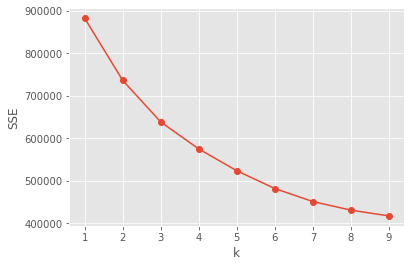

In [621]:
SSE = []
for k in range(1, 10):
    estimator = KMeans(n_clusters=k)
    estimator.fit(df_kmeans_scale)
    SSE.append(estimator.inertia_)
X = range(1, 10)
plt.xlabel('k')
plt.ylabel('SSE')
plt.plot(X, SSE, 'o-')
plt.show()

In [622]:
model_k = KMeans(n_clusters=4)
model_k.fit(df_kmeans_scale)
centers = model_k.cluster_centers_
origin_centers = ss.inverse_transform(centers)

In [623]:
origin_centers

array([[3.83110919e+01, 1.75289959e-04, 1.45919751e+00, 2.79884860e+01,
        5.57475093e-01, 2.39108680e+00, 4.62137436e+00, 1.51415466e+00],
       [4.68820054e+01, 9.96346677e-01, 1.64487925e+00, 3.54693288e+01,
        5.85550920e-01, 2.13182306e+00, 4.60982346e+00, 6.98173339e-01],
       [5.13930120e+01, 9.10871248e-05, 1.30237629e+00, 2.61988263e+01,
        5.46198753e-01, 1.98578512e+00, 4.42772723e+00, 2.22616933e-01],
       [4.50142428e+01, 9.37435260e-03, 3.16084853e+00, 2.69144779e+01,
        1.35002442e+00, 4.18070934e+00, 5.88497730e+00, 6.69567019e-01]])

In [648]:
df_center = pd.DataFrame(origin_centers,columns =df_kmeans.columns )

#df_center.rename(columns={0:'age',1:'male_TF',2:'app_opens',3:'weekly_consumption_hour',4:'cust_service_mssgs',5:'num_videos_completed',6:'num_videos_more_than_30_seconds',7:'payment_period'},inplace=True)
df_center.round(4)
df_center.to_csv('center.csv')

In [625]:
df_kmeans.columns

Index(['age', 'male_TF', 'app_opens', 'weekly_consumption_hour',
       'cust_service_mssgs', 'num_videos_completed',
       'num_videos_more_than_30_seconds', 'payment_period_x'],
      dtype='object')

In [438]:
model_k.labels_

array([0, 1, 3, ..., 3, 3, 1], dtype=int32)

In [439]:
label = pd.DataFrame(model_k.labels_,columns = ['clusters'])
label

,clusters
0,0
1,1
2,3
3,1
4,0
...,...
110311,2
110312,1
110313,3
110314,3


In [440]:
df_kmeans.reset_index(inplace = True)
df_kmeans

,subid,age,male_TF,app_opens,weekly_consumption_hour,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,payment_period_x
0,26844789,25.0,True,1.000000,36.001186,1.000000,6.500000,6.500000,0
1,29726122,61.0,False,0.975610,20.051667,0.414634,4.439024,4.439024,1
2,20299962,23.0,False,2.260870,34.551230,0.217391,1.826087,4.478261,1
3,24930568,73.0,False,1.500000,25.851492,1.500000,1.000000,6.500000,1
4,21361112,24.0,True,2.000000,37.451142,1.500000,1.000000,6.000000,1
...,...,...,...,...,...,...,...,...,...
110311,25492551,32.0,False,1.500000,30.201361,2.000000,6.000000,6.500000,2
110312,25549852,61.0,False,1.000000,28.751405,2.000000,0.000000,6.000000,1
110313,25835684,43.0,False,2.583333,24.401536,0.416667,3.916667,4.916667,1
110314,21434712,38.0,False,1.777778,28.751405,0.333333,2.222222,4.000000,1


In [441]:
kmeans_merge = pd.concat((df_kmeans,label),axis = 1)
kmeans_merge

,subid,age,male_TF,app_opens,weekly_consumption_hour,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,payment_period_x,clusters
0,26844789,25.0,True,1.000000,36.001186,1.000000,6.500000,6.500000,0,0
1,29726122,61.0,False,0.975610,20.051667,0.414634,4.439024,4.439024,1,1
2,20299962,23.0,False,2.260870,34.551230,0.217391,1.826087,4.478261,1,3
3,24930568,73.0,False,1.500000,25.851492,1.500000,1.000000,6.500000,1,1
4,21361112,24.0,True,2.000000,37.451142,1.500000,1.000000,6.000000,1,0
...,...,...,...,...,...,...,...,...,...,...
110311,25492551,32.0,False,1.500000,30.201361,2.000000,6.000000,6.500000,2,2
110312,25549852,61.0,False,1.000000,28.751405,2.000000,0.000000,6.000000,1,1
110313,25835684,43.0,False,2.583333,24.401536,0.416667,3.916667,4.916667,1,3
110314,21434712,38.0,False,1.777778,28.751405,0.333333,2.222222,4.000000,1,3


In [442]:
kmeans_merge['clusters'].value_counts()

1    43914
3    34094
2    19438
0    12870
Name: clusters, dtype: int64

In [591]:
df_merge

,Unnamed: 0,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,country,attribution_technical,...,cancel_date,trial_completed,creation_month,creation_year,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,payment_period_y,churn_TF
0,496617,26844789,enhanced,3.0,regional,replace OTT,36.001186,2.0,25.0,True,UAE,organic,...,NaN,True,12,2019,1.000000,1.000000,6.500000,6.500000,0.000000,0.500000,0.000000,1.0
1,192823,29726122,base,2.0,comedy,access to exclusive content,20.051667,2.0,61.0,False,UAE,bing,...,NaN,True,2,2020,0.975610,0.414634,4.439024,4.439024,0.146341,0.951220,0.756098,0.0
2,315863,20299962,base,3.0,drama,access to exclusive content,34.551230,2.0,23.0,False,UAE,email,...,NaN,True,3,2020,2.260870,0.217391,1.826087,4.478261,0.000000,0.630435,0.673913,0.0
3,254782,24930568,base,NaN,comedy,access to exclusive content,25.851492,NaN,73.0,False,UAE,facebook,...,NaN,True,2,2020,1.500000,1.500000,1.000000,6.500000,0.000000,0.000000,0.000000,0.0
4,290426,21361112,enhanced,NaN,comedy,access to exclusive content,37.451142,NaN,24.0,True,UAE,search,...,NaN,True,12,2019,2.000000,1.500000,1.000000,6.000000,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135014,230734,21928274,base,NaN,drama,replace OTT,NaN,NaN,NaN,False,UAE,facebook,...,NaN,True,1,2020,1.785714,0.571429,3.285714,6.285714,0.107143,0.785714,0.464286,1.0
135015,577745,25549852,enhanced,NaN,comedy,access to exclusive content,28.751405,NaN,61.0,False,UAE,affiliate,...,NaN,True,3,2020,1.000000,2.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.0
135016,603751,25835684,base,2.0,drama,access to exclusive content,24.401536,2.0,43.0,False,UAE,email,...,NaN,True,1,2020,2.583333,0.416667,3.916667,4.916667,0.000000,0.666667,0.000000,0.0
135017,509326,21434712,enhanced,3.0,comedy,supplement OTT,28.751405,2.0,38.0,False,UAE,facebook,...,NaN,True,11,2019,1.777778,0.333333,2.222222,4.000000,0.000000,0.222222,0.000000,0.0


In [592]:
df_seg_churn = pd.merge(df_merge,kmeans_merge,on = 'subid')
df_seg_churn

,Unnamed: 0,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour_x,num_ideal_streaming_services,age_x,male_TF_x,country,attribution_technical,...,num_series_started,payment_period_y,churn_TF,age_y,male_TF_y,app_opens_y,weekly_consumption_hour_y,cust_service_mssgs_y,num_videos_completed_y,num_videos_more_than_30_seconds_y,payment_period_x_y,clusters
0,496617,26844789,enhanced,3.0,regional,replace OTT,36.001186,2.0,25.0,True,UAE,organic,...,0.500000,0.000000,1.0,25.0,True,1.000000,36.001186,1.000000,6.500000,6.500000,0,0
1,192823,29726122,base,2.0,comedy,access to exclusive content,20.051667,2.0,61.0,False,UAE,bing,...,0.951220,0.756098,0.0,61.0,False,0.975610,20.051667,0.414634,4.439024,4.439024,1,1
2,315863,20299962,base,3.0,drama,access to exclusive content,34.551230,2.0,23.0,False,UAE,email,...,0.630435,0.673913,0.0,23.0,False,2.260870,34.551230,0.217391,1.826087,4.478261,1,3
3,254782,24930568,base,NaN,comedy,access to exclusive content,25.851492,NaN,73.0,False,UAE,facebook,...,0.000000,0.000000,0.0,73.0,False,1.500000,25.851492,1.500000,1.000000,6.500000,1,1
4,290426,21361112,enhanced,NaN,comedy,access to exclusive content,37.451142,NaN,24.0,True,UAE,search,...,0.000000,0.000000,0.0,24.0,True,2.000000,37.451142,1.500000,1.000000,6.000000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110311,378377,25492551,base,3.0,comedy,access to exclusive content,30.201361,2.0,32.0,False,UAE,email,...,0.500000,0.000000,0.0,32.0,False,1.500000,30.201361,2.000000,6.000000,6.500000,2,2
110312,577745,25549852,enhanced,NaN,comedy,access to exclusive content,28.751405,NaN,61.0,False,UAE,affiliate,...,0.000000,0.000000,0.0,61.0,False,1.000000,28.751405,2.000000,0.000000,6.000000,1,1
110313,603751,25835684,base,2.0,drama,access to exclusive content,24.401536,2.0,43.0,False,UAE,email,...,0.666667,0.000000,0.0,43.0,False,2.583333,24.401536,0.416667,3.916667,4.916667,1,3
110314,509326,21434712,enhanced,3.0,comedy,supplement OTT,28.751405,2.0,38.0,False,UAE,facebook,...,0.222222,0.000000,0.0,38.0,False,1.777778,28.751405,0.333333,2.222222,4.000000,1,3


In [593]:
df_seg_churn.groupby('clusters')['churn_TF'].value_counts()

clusters  churn_TF
0         0.0          7000
          1.0          5870
1         1.0         33562
          0.0         10352
2         0.0         10536
          1.0          8902
3         0.0         31029
          1.0          3065
Name: churn_TF, dtype: int64

In [626]:
df_seg_churn.groupby('clusters')['preferred_genre'].value_counts()

clusters  preferred_genre
0         comedy              5734
          drama               3544
          regional             872
          international        478
          other                299
1         comedy             15872
          drama               9100
          regional            1653
          international       1314
          other               1069
2         comedy             11086
          drama               3764
          regional             806
          international        470
          other                435
3         comedy             21290
          drama               4988
          regional            1630
          international        882
          other                402
Name: preferred_genre, dtype: int64

# Churn

In [451]:
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix
from sklearn import model_selection
from matplotlib import pyplot as plt
import numpy as np
import copy
import math

pd.options.display.max_columns = 25

假设 trial没结束或者现在不是sub的 都是churn的

In [399]:
sum((df_merge['trial_completed']== False) | (df_merge['current_sub_TF']== False))

59432

In [413]:
for i in range(df_merge.shape[0]):
    if df_merge.at[i,'trial_completed']==False:
        df_merge.at[i,'churn_TF'] = 1
    elif df_merge.at[i,'current_sub_TF']== False:
        df_merge.at[i,'churn_TF'] = 1
    else:
        df_merge.at[i,'churn_TF'] = 0



In [414]:
df_merge['churn_TF'].value_counts()

0.0    75587
1.0    59432
Name: churn_TF, dtype: int64

In [418]:
df_merge.columns

Index(['Unnamed: 0', 'subid', 'package_type', 'num_weekly_services_utilized',
       'preferred_genre', 'intended_use', 'weekly_consumption_hour',
       'num_ideal_streaming_services', 'age', 'male_TF', 'country',
       'attribution_technical', 'attribution_survey', 'op_sys',
       'months_per_bill_period', 'plan_type', 'monthly_price',
       'discount_price', 'account_creation_date', 'trial_end_date',
       'initial_credit_card_declined', 'join_fee', 'language', 'payment_type',
       'num_trial_days', 'current_sub_TF', 'payment_period_x', 'last_payment',
       'next_payment', 'cancel_date', 'trial_completed', 'creation_month',
       'creation_year', 'app_opens', 'cust_service_mssgs',
       'num_videos_completed', 'num_videos_more_than_30_seconds',
       'num_videos_rated', 'num_series_started', 'payment_period_y',
       'churn_TF'],
      dtype='object')

In [528]:
df_churn = df_merge[['subid','age','male_TF','app_opens','weekly_consumption_hour','cust_service_mssgs',
                     'num_videos_completed','num_videos_more_than_30_seconds','payment_period_x','churn_TF']]
df_churn

,subid,age,male_TF,app_opens,weekly_consumption_hour,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,payment_period_x,churn_TF
0,26844789,25.0,True,1.000000,36.001186,1.000000,6.500000,6.500000,0,1.0
1,29726122,61.0,False,0.975610,20.051667,0.414634,4.439024,4.439024,1,0.0
2,20299962,23.0,False,2.260870,34.551230,0.217391,1.826087,4.478261,1,0.0
3,24930568,73.0,False,1.500000,25.851492,1.500000,1.000000,6.500000,1,0.0
4,21361112,24.0,True,2.000000,37.451142,1.500000,1.000000,6.000000,1,0.0
...,...,...,...,...,...,...,...,...,...,...
135014,21928274,NaN,False,1.785714,NaN,0.571429,3.285714,6.285714,0,1.0
135015,25549852,61.0,False,1.000000,28.751405,2.000000,0.000000,6.000000,1,0.0
135016,25835684,43.0,False,2.583333,24.401536,0.416667,3.916667,4.916667,1,0.0
135017,21434712,38.0,False,1.777778,28.751405,0.333333,2.222222,4.000000,1,0.0


In [529]:
for i in range(df_churn.shape[0]):
    if df_churn.at[i,'male_TF'] == True:
        df_churn.at[i,'male_TF'] = 1
    else:
        df_churn.at[i,'male_TF'] = 0
df_churn

,subid,age,male_TF,app_opens,weekly_consumption_hour,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,payment_period_x,churn_TF
0,26844789,25.0,1,1.000000,36.001186,1.000000,6.500000,6.500000,0,1.0
1,29726122,61.0,0,0.975610,20.051667,0.414634,4.439024,4.439024,1,0.0
2,20299962,23.0,0,2.260870,34.551230,0.217391,1.826087,4.478261,1,0.0
3,24930568,73.0,0,1.500000,25.851492,1.500000,1.000000,6.500000,1,0.0
4,21361112,24.0,1,2.000000,37.451142,1.500000,1.000000,6.000000,1,0.0
...,...,...,...,...,...,...,...,...,...,...
135014,21928274,NaN,0,1.785714,NaN,0.571429,3.285714,6.285714,0,1.0
135015,25549852,61.0,0,1.000000,28.751405,2.000000,0.000000,6.000000,1,0.0
135016,25835684,43.0,0,2.583333,24.401536,0.416667,3.916667,4.916667,1,0.0
135017,21434712,38.0,0,1.777778,28.751405,0.333333,2.222222,4.000000,1,0.0


In [530]:
df_churn = df_churn.dropna(axis = 'index',how= 'any')

In [531]:
# ------ DEFINE FUNCTIONS -----
def apply_offers(df_churn, threshold, base_price, discount_amount, cases, acceptance_rate_churn, acceptance_rate_nonchurn):
    df_f = copy.deepcopy(df_churn)

    # set offer parameters for all observations
    df_f['price_no_offer'] = base_price
    df_f.loc[df_f['churn_TF'] == 1, 'price_no_offer'] = 0  # if the person churns they will pay 0

    # determine whether indiviudals accept offer
    df_f.loc[df_f['churn_TF'] == 1, 'accept_offer_prob'] = acceptance_rate_churn  # those who were going to churn are less likely to want the offer than those who were going to stay
    df_f.loc[df_f['churn_TF'] == 0, 'accept_offer_prob'] = acceptance_rate_nonchurn
    df_f['would_accept_offer_rand_draw'] = (df_f['random_draws'] < df_f['accept_offer_prob'])  # randomly select the individuals who would accept an offer based on their probability of acceptance

    # make offer under lpm predictions for select threshold
    df_f['make_offer_lpm'] = (df_f['prob_churn_lpm'] > threshold)     # predict whether individual will churn or not
    df_f['accept_offer_lpm'] = (df_f['make_offer_lpm'] & df_f['would_accept_offer_rand_draw'])
    df_f['price_lpm_offer'] = df_f['price_no_offer']  # initialize prices from "do nothing case"
    df_f.loc[df_f['accept_offer_lpm'], 'price_lpm_offer'] = base_price * (1-discount_amount)    # for those who were both made an offer and would accept, set prices to discounted price

    # make offer under logit predictions for select threshold
    df_f['make_offer_logit'] = (df_f['prob_churn_logit'] > threshold)     # predict whether individual will churn or not
    df_f['accept_offer_logit'] = (df_f['make_offer_logit'] & df_f['would_accept_offer_rand_draw'])
    df_f['price_logit_offer'] = df_f['price_no_offer']  # initialize prices from "do nothing case"
    df_f.loc[df_f['accept_offer_logit'], 'price_logit_offer'] = base_price * (1-discount_amount)    # for those who were both made an offer and would accept, set prices to discounted price

    df_impact = pd.DataFrame(index=cases, columns=['subs', 'revenue', 'lift_from_no_offer'])
    for c in cases:
        df_impact.loc[c, 'subs'] = (df_f['price_' + c] > 0).sum()
        df_impact.loc[c, 'revenue'] = df_f['price_' + c].sum()
    for c in cases:
        df_impact.loc[c, 'lift_from_no_offer'] = df_impact.loc[c, 'revenue'] / df_impact.loc['no_offer', 'revenue'] - 1

    return df_f, df_impact

In [532]:
def get_gini_info(actual, pred_prob):
    # format[[obs0_pred0, obs0_pred1], [obs1_pred0, obs1_pred1]]; rows (i) are observed, columns (j) are predicted
    confusion_matrix_list = list()
    for t in [x / 100 for x in range(0, 100, 33)]:
        pred = [1 if (x > t) else 0 for x in pred_prob]
        confusion_matrix_list.append(confusion_matrix(actual, pred))
        # confusion_matrix_list.append(model.pred_table(threshold=t))

    # create Gini coefficient plots
    false_positives = list()
    true_positives = list()
    for t in confusion_matrix_list:
        true_positives.append(t[1, 1])
        false_positives.append(t[0, 1])

    return confusion_matrix_list, false_positives, true_positives

In [533]:
df_train, df_test = model_selection.train_test_split(df_churn, test_size=0.3,random_state = 42)

In [534]:
# ----- FIT CHURN MODEL ------
y_col_name = 'churn_TF' # specify which column contains outcome variable y. Needs to be coded as binary True/False or 0/1
x_col_name = ['age','male_TF','app_opens','weekly_consumption_hour','cust_service_mssgs','num_videos_completed','num_videos_more_than_30_seconds','payment_period_x']    # 'age','male_TF','app_opens','weekly_consumption_hour','cust_service_mssgs','num_videos_completed','num_videos_more_than_30_seconds','payment_period_x'
add_constant_TF = True

In [535]:
# --- preprocess data for model routine format requirements
if add_constant_TF:
    x_col_name.append('const')
    df_train = sm.add_constant(df_train)
    df_test = sm.add_constant(df_test)

In [539]:
# --- fit linear probability model
lpm_model = sm.OLS(endog=df_train[y_col_name].astype(float), exog=df_train[x_col_name].astype(float))
lpm_results = lpm_model.fit()
print("\nRESULTS OF LINEAR MODEL FITTING\n")
print(lpm_results.summary())


RESULTS OF LINEAR MODEL FITTING

                            OLS Regression Results                            
Dep. Variable:               churn_TF   R-squared:                       0.568
Model:                            OLS   Adj. R-squared:                  0.568
Method:                 Least Squares   F-statistic:                 1.270e+04
Date:                Mon, 13 Dec 2021   Prob (F-statistic):               0.00
Time:                        14:46:03   Log-Likelihood:                -23442.
No. Observations:               77221   AIC:                         4.690e+04
Df Residuals:                   77212   BIC:                         4.698e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

In [540]:
# --- fit logistic regression
logit_model = sm.Logit(endog=df_train[y_col_name].astype(float), exog=df_train[x_col_name].astype(float))
logit_results = logit_model.fit()
print("\nRESULTS OF LOGIT MODEL FITTING\n")
print(logit_results.summary())

Optimization terminated successfully.
         Current function value: 0.285896
         Iterations 7

RESULTS OF LOGIT MODEL FITTING

                           Logit Regression Results                           
Dep. Variable:               churn_TF   No. Observations:                77221
Model:                          Logit   Df Residuals:                    77212
Method:                           MLE   Df Model:                            8
Date:                Mon, 13 Dec 2021   Pseudo R-squ.:                  0.5862
Time:                        14:46:07   Log-Likelihood:                -22077.
converged:                       True   LL-Null:                       -53348.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
age                              

In [542]:
# ----- EVALUATE MODEL PERFORMANCE -----
# --- evaluate model predictions on test set graphically
df_test['prob_churn_lpm'] = lpm_results.predict(df_test[x_col_name].astype(float))
df_test['prob_churn_logit'] = logit_results.predict(df_test[x_col_name].astype(float))

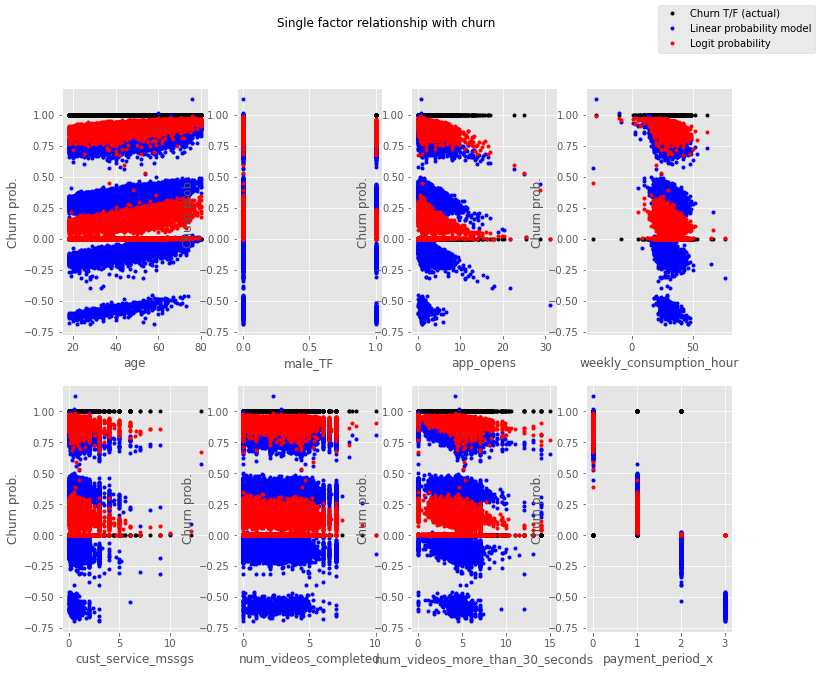

In [558]:
# plot predictions vs. data
select_plot_coef = [x for x in x_col_name if x != 'const']
n_rows = 2
n_cols = math.ceil(len(select_plot_coef) / n_rows)
fig, axes = plt.subplots(n_rows, n_cols,figsize = (12,10))
fig.suptitle('Single factor relationship with churn')
for i in range(n_rows):
    for j in range(n_cols):
        select_coef = select_plot_coef[i * n_cols + j]
        axes[i, j].plot(df_test[select_coef], df_test['churn_TF'], 'k.')
        axes[i, j].plot(df_test[select_coef], df_test['prob_churn_lpm'], 'b.')
        axes[i, j].plot(df_test[select_coef], df_test['prob_churn_logit'], 'r.')
        axes[i, j].set(xlabel=select_coef, ylabel='Churn prob.')
fig.legend(labels=['Churn T/F (actual)', 'Linear probability model', 'Logit probability'])

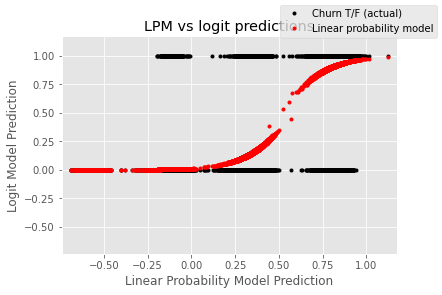

In [545]:
# compare lpm and logit predictions
fig = plt.figure()
ax = plt.gca()
ax.plot(df_test[['prob_churn_lpm']], df_test[['churn_TF']], 'k.')
ax.plot(df_test[['prob_churn_lpm']], df_test[['prob_churn_logit']], 'r.')
plt.ylim(df_test[['prob_churn_lpm', 'prob_churn_logit']].min().min()-.05, df_test[['prob_churn_lpm', 'prob_churn_logit']].max().max()+.05)
plt.xlim(ax.get_ylim())
plt.title('LPM vs logit predictions')
plt.xlabel('Linear Probability Model Prediction')
plt.ylabel('Logit Model Prediction')
fig.legend(labels=['Churn T/F (actual)', 'Linear probability model', 'Logit probability'])

In [546]:
# --- evaluate model predictions using numerical quantification (ROC curves)
# make confusion matrices
logit_conf_mat, logit_false_positives, logit_true_positives = get_gini_info(df_test['churn_TF'], df_test['prob_churn_logit'])
lpm_conf_mat, lpm_false_positives, lpm_true_positives = get_gini_info(df_test['churn_TF'], df_test['prob_churn_lpm'])



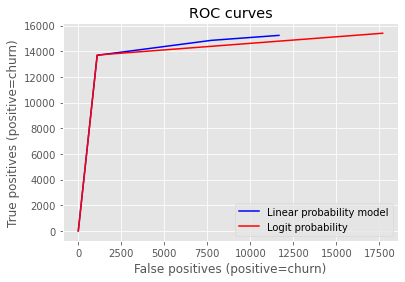

In [547]:
# plot ROC curves
fig = plt.figure()
ax1 = plt.gca()
ax1.plot(lpm_false_positives, lpm_true_positives, 'b-')
ax1.plot(logit_false_positives, logit_true_positives, 'r-')
plt.title('ROC curves')
plt.xlabel('False positives (positive=churn)')
plt.ylabel('True positives (positive=churn)')
plt.legend(labels=['Linear probability model', 'Logit probability'])

In [568]:
from sklearn.datasets import load_breast_cancer
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pylab as plt
import warnings;warnings.filterwarnings('ignore')

In [569]:
def roc_draw(y_test, pred):
    fpr, tpr, threshold = metrics.roc_curve(y_test, pred)
    roc_auc = metrics.auc(fpr, tpr)
    plt.figure(figsize=(6,6))
    plt.title('ROC')
    plt.plot(fpr, tpr, 'b', label = 'Val AUC = %0.3f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    

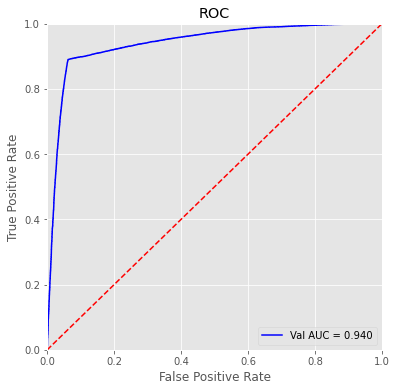

In [570]:
roc_draw(df_test['churn_TF'],df_test['prob_churn_logit'])

In [548]:
# ----- TEST RETENTION OFFER SCENARIOS -----
# evaluate the impact of an offer
acceptance_rate_nonchurn = 1
acceptance_rate_churn = 0.3
threshold = 0.5
base_price = 10
discount_amount = 0.3
cases = ['no_offer', 'lpm_offer', 'logit_offer']

In [549]:
# draw whether individual would accept an offer or not - assume probability of acceptance is independent of offer attractiveness
df_test['random_draws'] = np.random.random(df_test.shape[0])

In [550]:
# base assessment
df_test, df_impact = apply_offers(df_test, threshold, base_price, discount_amount, cases, acceptance_rate_churn, acceptance_rate_nonchurn)



In [551]:
# test sensitivity to thresholds
df_lift_threshold = pd.DataFrame(index=range(0, 100, 1), columns=['threshold'] + cases)
for t_ind in df_lift_threshold.index:
    t_threshold = t_ind / 100
    
    _, t_df_impact = apply_offers(df_test, t_threshold, base_price, discount_amount, cases, acceptance_rate_churn, acceptance_rate_nonchurn)

    df_lift_threshold.loc[t_ind, 'threshold'] = t_threshold
    df_lift_threshold.loc[t_ind, cases] = t_df_impact.loc[cases, 'lift_from_no_offer']
del t_df_impact, t_threshold, t_ind



In [555]:
# test sensitivity to acceptance rate for churners
df_lift_acceptance_rate_churn = pd.DataFrame(index=range(0, 100, 1), columns=['acceptance_rate_churn'] + cases)
for t_ind in df_lift_acceptance_rate_churn.index:
    t_acceptance_rate_churn = t_ind / 100
    _, t_df_impact = apply_offers(df_test, threshold, base_price, discount_amount, cases, t_acceptance_rate_churn, acceptance_rate_nonchurn)
    df_lift_acceptance_rate_churn.loc[t_ind, 'acceptance_rate_churn'] = t_acceptance_rate_churn
    df_lift_acceptance_rate_churn.loc[t_ind, cases] = t_df_impact.loc[cases, 'lift_from_no_offer']
del t_df_impact, t_acceptance_rate_churn, t_ind



In [553]:
# test sensitivity to offer discount amount
df_lift_discount_amount = pd.DataFrame(index=range(0, 100, 1), columns=['discount_amount'] + cases)
for t_ind in df_lift_discount_amount.index:
    t_discount_amount = t_ind / 100
    acceptance_rate_churn = t_discount_amount
    _, t_df_impact = apply_offers(df_test, threshold, base_price, t_discount_amount, cases, acceptance_rate_churn, acceptance_rate_nonchurn)

    df_lift_discount_amount.loc[t_ind, 'discount_amount'] = t_discount_amount
    df_lift_discount_amount.loc[t_ind, cases] = t_df_impact.loc[cases, 'lift_from_no_offer']
del t_df_impact, t_discount_amount, t_ind

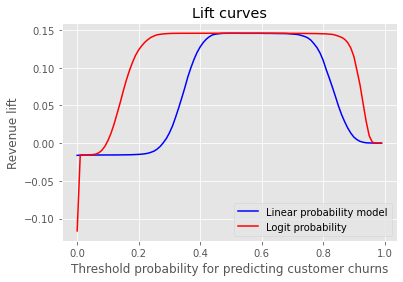

In [655]:
# --- plot lift curves
# Threshold sensitivity
fig = plt.figure()
ax1 = plt.gca()
ax1.plot(df_lift_threshold['threshold'], df_lift_threshold['lpm_offer'], 'b-')
ax1.plot(df_lift_threshold['threshold'], df_lift_threshold['logit_offer'], 'r-')
plt.title('Lift curves')
plt.xlabel('Threshold probability for predicting customer churns')
plt.ylabel('Revenue lift')
plt.legend(labels=['Linear probability model', 'Logit probability'])



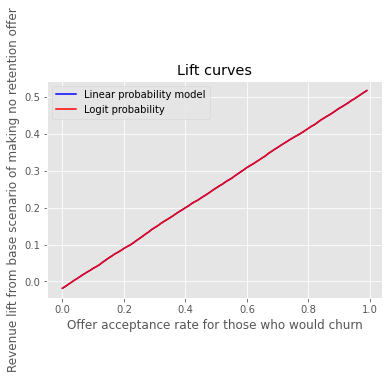

In [556]:
# Acceptance rate sensitivity
fig = plt.figure()
ax1 = plt.gca()
ax1.plot(df_lift_acceptance_rate_churn['acceptance_rate_churn'], df_lift_acceptance_rate_churn['lpm_offer'], 'b-')
ax1.plot(df_lift_acceptance_rate_churn['acceptance_rate_churn'], df_lift_acceptance_rate_churn['logit_offer'], 'r-')
plt.title('Lift curves')
plt.xlabel('Offer acceptance rate for those who would churn')
plt.ylabel('Revenue lift from base scenario of making no retention offer')
plt.legend(labels=['Linear probability model', 'Logit probability'])



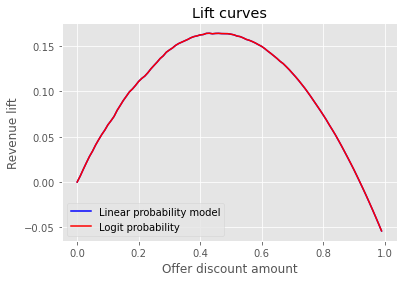

In [654]:
# Discount amount sensitivity
fig = plt.figure()
ax1 = plt.gca()
ax1.plot(df_lift_discount_amount['discount_amount'], df_lift_discount_amount['lpm_offer'], 'b-')
ax1.plot(df_lift_discount_amount['discount_amount'], df_lift_discount_amount['logit_offer'], 'r-')
plt.title('Lift curves')
plt.xlabel('Offer discount amount')
plt.ylabel('Revenue lift')
plt.legend(labels=['Linear probability model', 'Logit probability'])

In [578]:
#set
# threshold = 0.5
# base_num = 33095
# df_test['prob_churn_logit'] = logit_results.predict(df_test[x_col_name].astype(float))
# aa = df_test[df_test['prob_churn_logit']>threshold].shape[0]
# model_churn_r = aa/33095
# print('churn rate:',model_churn_r)
# model_churn_num = round(base_num*model_churn_r)
# model_not_churn = base_num-model_churn_num

offerall_revenue_dict = {}
offerchurn_revenue_dict = {}
offerall_lift_dict = {}
offerchurn_lift_dict = {}

#看不同discount和不同offer人群对应的revenue
for threshold in [0.4,0.5,0.6,0.7,0.8,0.9]:
    base_num = 33095
    df_test['prob_churn_logit'] = logit_results.predict(df_test[x_col_name].astype(float))
    aa = df_test[df_test['prob_churn_logit']>threshold].shape[0]
    model_churn_r = aa/33095
    #print('churn rate:',model_churn_r)
    model_churn_num = round(base_num*model_churn_r)
    model_not_churn = base_num-model_churn_num
    
    for discount in [0.1,0.2,0.3,0.4,0.5,0.6,0.7]:
        #print('discount:',discount)
        accept_rate = discount

        #不给offer
        no_discount_revenue = model_not_churn*10
        #print('不给offer的revenue：',no_discount_revenue)

        #给所有人offer
        churn_revenue = model_churn_num*accept_rate*(1-discount)*10
        not_churn_revenue = model_not_churn*10*(1-discount)
        all_churn_revenue = churn_revenue + not_churn_revenue
        #print('给所有人offer的revenue：',all_churn_revenue)
        lift1 = all_churn_revenue/no_discount_revenue
        #print('给所有人offer的提升：',lift1)
        offerall_revenue_dict[(threshold,discount)] = all_churn_revenue
        offerall_lift_dict[(threshold,discount)] = lift1

        #只给churn offer
        only_churn_revenue = churn_revenue+no_discount_revenue
        lift2 = only_churn_revenue/no_discount_revenue
        #print('只给churn的人offer的revenue',only_churn_revenue)
        #print('只给churn的人offer的提升：',lift2)
        offerchurn_revenue_dict[(threshold,discount)] = only_churn_revenue
        offerchurn_lift_dict[(threshold,discount)] = lift2
        
    
    
#     #预测的churn如果比实际多10%
#     act_not_churn_revenue = no_discount_revenue + model_churn_num * 0.1 * 10* (1-discount)
#     act_churn_revenue = linear_churn_num * 0.9 * accept_rate*(1-discount)*10
#     act_revenue = act_not_churn_revenue+act_churn_revenue
#     lift3 = act_revenue/no_discount_revenue
#     print('预测的churn如果比实际多百分之10:',lift3)
    
#         #预测的churn如果比实际少10%
#     act_not_churn_revenue2 = (model_not_churn-model_churn_num*0.1)*10
#     act_churn_revenue2 = model_churn_num * accept_rate*(1-discount)*10
#     act_revenue2 = act_not_churn_revenue2+act_churn_revenue2
#     lift4 = act_revenue2/no_discount_revenue
#     print('预测的churn如果比实际少百分之10:',lift4)
    

In [585]:
offerall_revenue =pd.DataFrame()
offerchurn_revenue = pd.DataFrame()
offerall_lift = pd.DataFrame()
offerchurn_lift = pd.DataFrame()


In [586]:
for threshold in [0.4,0.5,0.6,0.7,0.8,0.9]:
    for discount in [0.1,0.2,0.3,0.4,0.5,0.6,0.7]:
        offerall_lift.at[threshold,discount] = offerall_lift_dict[(threshold,discount)]
        offerall_revenue.at[threshold,discount] = offerall_revenue_dict[(threshold,discount)]
        offerchurn_lift.at[threshold,discount] = offerchurn_lift_dict[(threshold,discount)]
        offerchurn_revenue.at[threshold,discount] = offerchurn_revenue_dict[(threshold,discount)]

In [652]:
offerall_lift.to_csv('offerall_lift.csv')

In [653]:
offerchurn_lift.to_csv('offerchurn_lift.csv')

In [649]:
df_churn.describe()

,subid,age,app_opens,weekly_consumption_hour,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,payment_period_x,churn_TF
count,1.103160e+05,110316.000000,110316.000000,110316.000000,110316.000000,110316.000000,110316.000000,110316.000000,110316.000000
mean,2.499094e+07,45.691424,1.716256,27.960503,0.694976,2.512739,4.764103,0.757043,0.465925
std,2.886052e+06,13.560347,1.475439,4.836389,0.645747,1.632345,1.240483,0.792867,0.498840
min,2.000006e+07,18.000000,0.000000,-32.146760,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.249196e+07,35.000000,1.000000,24.401536,0.325000,1.111111,4.289474,0.000000,0.000000
50%,2.498478e+07,46.000000,1.083333,27.301448,0.500000,2.380952,4.714286,1.000000,0.000000
75%,2.749816e+07,56.000000,2.000000,30.201361,0.853039,3.755556,5.400000,1.000000,1.000000
max,2.999982e+07,80.000000,45.250000,76.599962,13.000000,13.000000,15.000000,3.000000,1.000000


In [657]:
#set
threshold = 0.7
base_num = 33095
df_test['prob_churn_logit'] = logit_results.predict(df_test[x_col_name].astype(float))
aa = df_test[df_test['prob_churn_logit']>threshold].shape[0]
model_churn_r = aa/33095
print('churn rate:',model_churn_r)
model_churn_num = round(base_num*model_churn_r)
model_not_churn = base_num-model_churn_num

#看不同discount和不同offer人群对应的revenue
    
for discount in [0.4,0.5,0.6]:
    print('discount:',discount)
    accept_rate = discount

    #不给offer
    no_discount_revenue = model_not_churn*10
    print('不给offer的revenue：',no_discount_revenue)
    
    #给所有人offer
    churn_revenue = model_churn_num*accept_rate*(1-discount)*10        
    not_churn_revenue = model_not_churn*10*(1-discount)
    all_churn_revenue = churn_revenue + not_churn_revenue
    print('给所有人offer的revenue：',all_churn_revenue)
    lift1 = all_churn_revenue/no_discount_revenue
    print('给所有人offer的提升：',lift1)


    #只给churn offer
    only_churn_revenue = churn_revenue+no_discount_revenue
    lift2 = only_churn_revenue/no_discount_revenue
    print('只给churn的人offer的revenue',only_churn_revenue)
    print('只给churn的人offer的提升：',lift2)

        
    
    
#     #预测的churn如果比实际多10%
#     act_not_churn_revenue = no_discount_revenue + model_churn_num * 0.1 * 10* (1-discount)
#     act_churn_revenue = linear_churn_num * 0.9 * accept_rate*(1-discount)*10
#     act_revenue = act_not_churn_revenue+act_churn_revenue
#     lift3 = act_revenue/no_discount_revenue
#     print('预测的churn如果比实际多百分之10:',lift3)
    
    #预测的churn如果比实际少10%
    act_not_churn_revenue2 = (model_not_churn-model_churn_num*0.1)*10
    act_churn_revenue2 = model_churn_num * accept_rate*(1-discount)*10
    act_revenue2 = act_not_churn_revenue2+act_churn_revenue2
    lift4 = act_revenue2/no_discount_revenue
    print('预测的churn如果比实际少百分之10:',lift4)

churn rate: 0.4472881099864028
discount: 0.4
不给offer的revenue： 182920
给所有人offer的revenue： 145279.2
给所有人offer的提升： 0.7942226109774766
只给churn的人offer的revenue 218447.2
只给churn的人offer的提升： 1.1942226109774765
预测的churn如果比实际少百分之10: 1.1132965230701948
discount: 0.5
不给offer的revenue： 182920
给所有人offer的revenue： 128467.5
给所有人offer的提升： 0.7023152197682047
只给churn的人offer的revenue 219927.5
只给churn的人offer的提升： 1.2023152197682048
预测的churn如果比实际少百分之10: 1.1213891318609228
discount: 0.6
不给offer的revenue： 182920
给所有人offer的revenue： 108695.2
给所有人offer的提升： 0.5942226109774765
只给churn的人offer的revenue 218447.2
只给churn的人offer的提升： 1.1942226109774765
预测的churn如果比实际少百分之10: 1.1132965230701948
